In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE #Valanceo de datos en las variables de X y Y
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc



In [ ]:
# Cargar los datos
data = pd.read_csv('data_evaluacion.csv')

In [ ]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<Axes: >

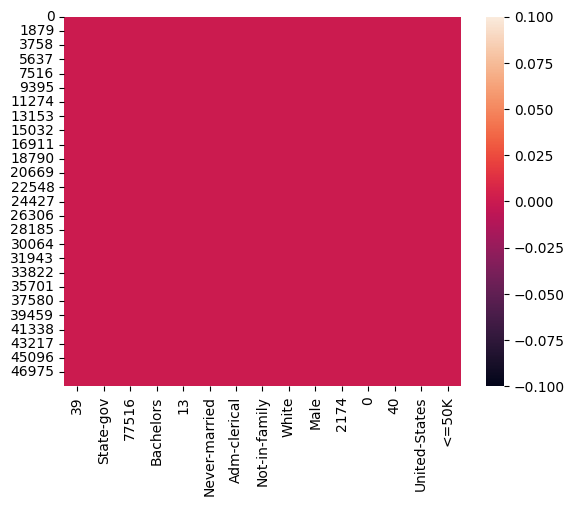

In [ ]:
sns.heatmap(data.isna())

In [ ]:
new_headers = ['Edad', 'Tipo_empleador', 'Id', 'Nivel_educativo', 'Tiempo_educacion',
               'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Genero', 'Ganancias',
               'Perdidas', 'Horas_trab_x_Semana', 'Origen', 'Ingreso']
data.columns = new_headers
data.head(100)

,Edad,Tipo_empleador,Id,Nivel_educativo,Tiempo_educacion,Estado_civil,Ocupacion,Relacion,Raza,Genero,Ganancias,Perdidas,Horas_trab_x_Semana,Origen,Ingreso
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K


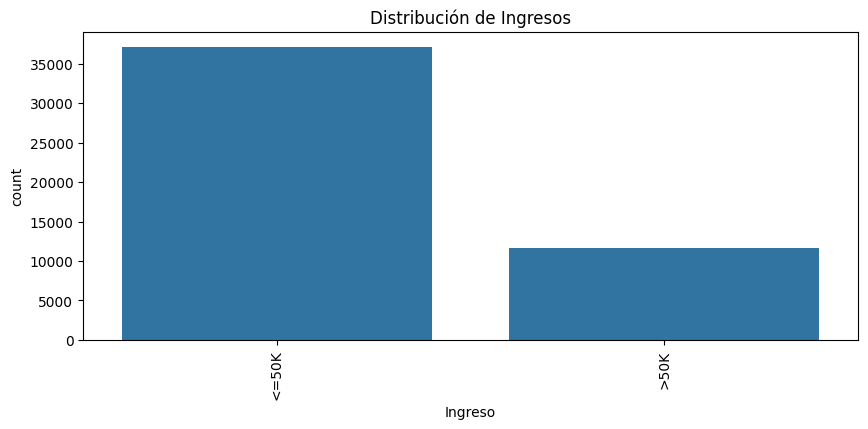

In [ ]:
import matplotlib.pyplot as plt
# Analizar la distribución de los datos de ocupación
plt.figure(figsize=(10,4))
sns.countplot(x='Ingreso', data=data)
plt.xticks(rotation=90)
plt.title('Distribución de Ingresos')
plt.show()


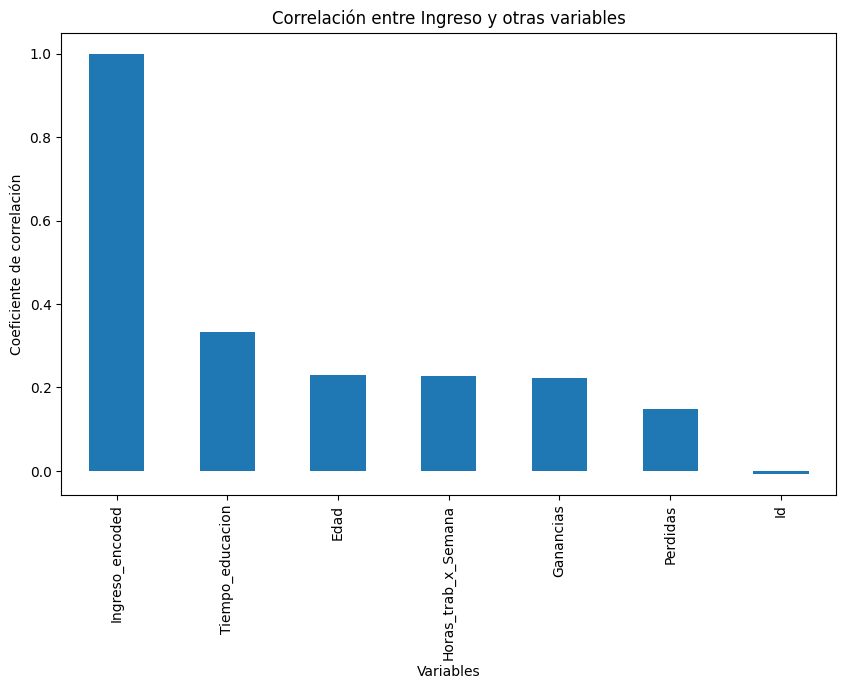

In [ ]:
# Suponiendo que quieres la correlación entre 'Ingreso' y todas las demás variables
# Primero, necesitamos codificar 'Ingreso' a valores numéricos porque la correlación
# de Pearson trabaja con datos numéricos.

le = LabelEncoder()
data['Ingreso_encoded'] = le.fit_transform(data['Ingreso'])

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr_matrix = numerical_data.corr() # Change to calculate correlation only on numerical data

# Grafica la correlación entre 'Ocupacion' y las demás variables
plt.figure(figsize=(10, 6))
corr_matrix['Ingreso_encoded'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación entre Ingreso y otras variables')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de correlación')
plt.show()


In [ ]:
data.head(100)

,Edad,Tipo_empleador,Id,Nivel_educativo,Tiempo_educacion,Estado_civil,Ocupacion,Relacion,Raza,Genero,Ganancias,Perdidas,Horas_trab_x_Semana,Origen,Ingreso,Ingreso_encoded
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K,1
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K,1
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K,0
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K,0


###CATEGORIZAR LA VARIABLE OBJETIVO

In [ ]:
Ingreso_encoded_counts = data['Ingreso_encoded'].value_counts()
print(Ingreso_encoded_counts)

Ingreso_encoded
0    37154
1    11687
Name: count, dtype: int64


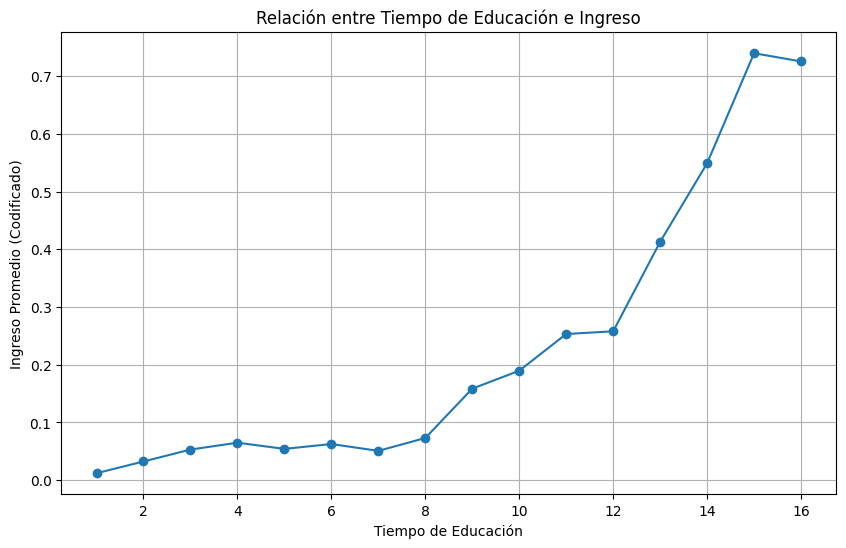

In [ ]:
import matplotlib.pyplot as plt

# Agrupa los datos por 'Tiempo_educacion' y calcula el ingreso promedio para cada grupo
grouped_data = data.groupby('Tiempo_educacion')['Ingreso_encoded'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Tiempo_educacion'], grouped_data['Ingreso_encoded'], marker='o')
plt.xlabel('Tiempo de Educación')
plt.ylabel('Ingreso Promedio (Codificado)')
plt.title('Relación entre Tiempo de Educación e Ingreso')
plt.grid(True)
plt.show()


###Separar las características (X) y la variable objetivo (y)



In [ ]:
X = data.drop(['Ingreso', 'Ingreso_encoded'], axis=1)  # Elimina las columnas 'Ingreso' y 'Ingreso_encoded'
y = data['Ingreso_encoded']  # La variable objetivo es 'Ingreso_encoded'


###EQUILIBRAR LA DATA

In [ ]:
# Crear un objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a los datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
# Crear un nuevo DataFrame con los datos equilibrados
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Ingreso_encoded'] = y_resampled
# Verificar el equilibrio de las clases
print(balanced_data['Ingreso_encoded'].value_counts())


Ingreso_encoded
0    37154
1    37154
Name: count, dtype: int64


###TRATAMIENTO DE LA DATA

In [ ]:
# Identify categorical columns
categorical_cols = X_resampled.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_resampled.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(X_resampled)

### DIVIDIR LA DATA

In [34]:
# prompt: separa la data en train y test

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled, test_size=0.2, random_state=2)


In [ ]:
# Aplicar SMOTE para balancear los datos separados en test y tarin

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
#X_test, y_test = smote.fit_resample(X_test, y_test)

In [ ]:
print('Numero de muestras en y_train:', np.bincount(y_train))
#print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y_train: [29737 29737]


### MODELO DE BAYES


In [ ]:
lrm =  GaussianNB()
lrm.fit(X_train.toarray(),y_train) # Convert X_train to a dense NumPy array


GaussianNB()

In [ ]:
y_pred = lrm.predict(X_test.toarray()) # Convert X_test to a dense array before prediction
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.42      0.57      7417
           1       0.62      0.95      0.75      7445

    accuracy                           0.68     14862
   macro avg       0.76      0.68      0.66     14862
weighted avg       0.76      0.68      0.66     14862



In [36]:

# Calcula la precisión en el conjunto de entrenamiento
train_accuracy = lrm.score(X_train.toarray(), y_train)
print("Train Accuracy:", train_accuracy)

# Calcula la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.5010766073411163
Test Accuracy: 0.6838918046023416


In [37]:

# Calcula la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.6838918046023416


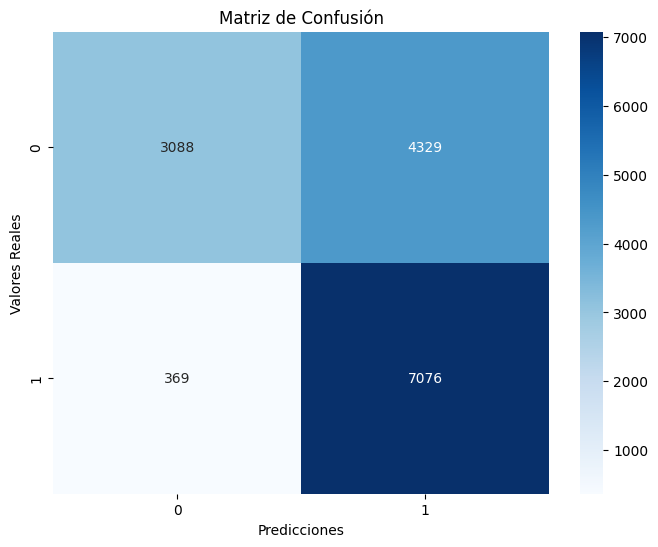

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
